***Technohacks-Machine Learning Project***

Dataset-boks.csv(from Kaggle)

**Task-1:Preprocessing**

Problem Statement:
Prepare a dataset for analysis by cleaning and preprocessing it.

Steps to Complete:

Download a dataset (e.g., from Kaggle).

Load the dataset using Pandas.

Handle missing values and normalize data as needed.

Save the cleaned dataset to a new file.

Tools/Datasets/Platforms:
Python, Pandas, Jupyter Notebook

✅ Dataset Overview

Rows: 1000

Columns: title, price, stock, rating, category, book_url

Issues:

stock is a string (e.g., "In stock (20 available)")

rating is a string (e.g., "Three", "Four")

category is categorical

book_url might not be needed



***Importing necessary libraries***

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

***Load The Dataset***

In [2]:
df=pd.read_csv("C:/Users/KAVYA/Downloads/boks.csv")

***Inspect the Dataset***

Number of rows and columns in dataset

In [3]:
df.shape

(1000, 6)

Names of the columns of the dataset

In [4]:
df.columns

Index(['title', 'price', 'stock', 'rating', 'category', 'book_url'], dtype='object')

First 5 dataentries rows of the dataset

In [5]:
df.head()

,title,price,stock,rating,category,book_url
0,A Light in the Attic,51.77,In stock,Three,Poetry,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,53.74,In stock,One,Historical Fiction,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,50.10,In stock,One,Fiction,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,47.82,In stock,Four,Mystery,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,History,http://books.toscrape.com/catalogue/sapiens-a-...


Info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     1000 non-null   object 
 1   price     1000 non-null   float64
 2   stock     1000 non-null   object 
 3   rating    1000 non-null   object 
 4   category  1000 non-null   object 
 5   book_url  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


Basic Statistics

In [7]:
df.describe(include='all')

,title,price,stock,rating,category,book_url
count,1000,1000.00000,1000,1000,1000,1000
unique,999,NaN,1,5,50,1000
top,The Star-Touched Queen,NaN,In stock,One,Default,http://books.toscrape.com/catalogue/1000-place...
freq,2,NaN,1000,226,152,1
mean,NaN,35.07035,NaN,NaN,NaN,NaN
std,NaN,14.44669,NaN,NaN,NaN,NaN
min,NaN,10.00000,NaN,NaN,NaN,NaN
25%,NaN,22.10750,NaN,NaN,NaN,NaN
50%,NaN,35.98000,NaN,NaN,NaN,NaN
75%,NaN,47.45750,NaN,NaN,NaN,NaN


***remove duplicate titles***

In [8]:
df=df.drop_duplicates(subset='title')
df.shape

(999, 6)

***Clean Stock Column(extract number from stock using regex)***

In [9]:
df.drop('stock',axis=1,inplace=True)

***Convert 'rating' from text to numeric***

In [10]:
rating_map={
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['rating']=df['rating'].map(rating_map)

***Drop 'book_url' (not useful for analysis)***

In [11]:
df.drop('book_url',axis=1,inplace=True)

***Normalize 'price' using Min-Max Scaling***

In [12]:
df['price_normalized']=(df['price']-df['price'].min())/(df['price'].max()-df['price'].min())

***One-hot encode 'category' (drop_first=True to avoid dummy variable trap)***

In [13]:
df=pd.get_dummies(df,columns=['category'],drop_first=True)

In [14]:
df.head()

,title,price,rating,price_normalized,category_Add a comment,category_Adult Fiction,category_Art,category_Autobiography,category_Biography,category_Business,...,category_Self Help,category_Sequential Art,category_Short Stories,category_Spirituality,category_Sports and Games,category_Suspense,category_Thriller,category_Travel,category_Womens Fiction,category_Young Adult
0,A Light in the Attic,51.77,3,0.835567,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Tipping the Velvet,53.74,1,0.874975,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Soumission,50.10,1,0.802160,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Sharp Objects,47.82,4,0.756551,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Sapiens: A Brief History of Humankind,54.23,5,0.884777,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


📌 Output Columns in Cleaned Data
After preprocessing, final dataset will include:

title (string)

price (float)

rating (int: 1 to 5)

price_normalized (float between 0 and 1)

category_* (one-hot encoded category columns)

***Task-2: Exploratory Data Analysis(EDA)***
Problem Statement:

Perform exploratory data analysis on a chosen dataset.

Steps to Complete:

Load the cleaned dataset using Pandas.

Create visualizations using Matplotlib and Seaborn.

Summarize insights and key findings from your analysis.

Tools/Datasets/Platforms:

Python, Pandas, Matplotlib, Seaborn.

***Import libraries***

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

***Set Style for seaborn***

In [16]:
sns.set(style="whitegrid")

Cleaned dataset overview

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        999 non-null    object 
 1   price                        999 non-null    float64
 2   rating                       999 non-null    int64  
 3   price_normalized             999 non-null    float64
 4   category_Add a comment       999 non-null    bool   
 5   category_Adult Fiction       999 non-null    bool   
 6   category_Art                 999 non-null    bool   
 7   category_Autobiography       999 non-null    bool   
 8   category_Biography           999 non-null    bool   
 9   category_Business            999 non-null    bool   
 10  category_Childrens           999 non-null    bool   
 11  category_Christian           999 non-null    bool   
 12  category_Christian Fiction   999 non-null    bool   
 13  category_Classics        

*** Check for missing values***

In [19]:
df.isnull().sum()

title                          0
price                          0
rating                         0
price_normalized               0
category_Add a comment         0
category_Adult Fiction         0
category_Art                   0
category_Autobiography         0
category_Biography             0
category_Business              0
category_Childrens             0
category_Christian             0
category_Christian Fiction     0
category_Classics              0
category_Contemporary          0
category_Crime                 0
category_Cultural              0
category_Default               0
category_Erotica               0
category_Fantasy               0
category_Fiction               0
category_Food and Drink        0
category_Health                0
category_Historical            0
category_Historical Fiction    0
category_History               0
category_Horror                0
category_Humor                 0
category_Music                 0
category_Mystery               0
category_N

There are no missing values

***Distribution of price and rating***

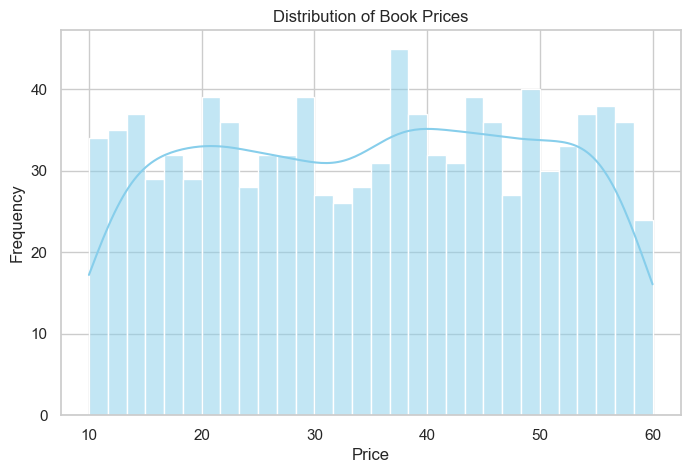

In [20]:
#Histogram of book prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'],bins=30,kde=True,color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

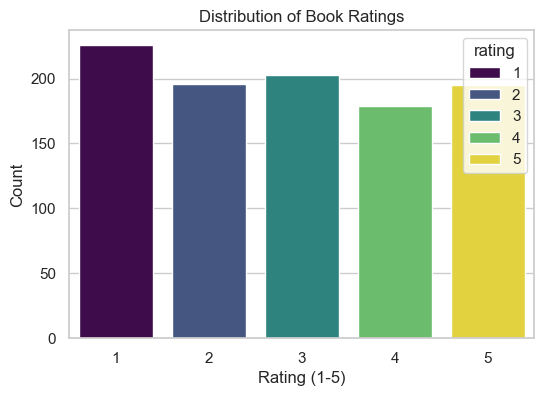

In [28]:
# Countplot of Ratings
plt.figure(figsize=(6,4))
sns.countplot(x='rating',data=df,hue='rating',palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.show()

***Get one-hot encoded category columns***

In [25]:
category_columns=[col for col in df.columns if col.startswith('category_')]

***Sum the one-hot encoded columns to count category occurrences***

In [26]:
category_counts=df[category_columns].sum().sort_values(ascending=False).head(10)

***Convert category_counts to DataFrame***

In [34]:
category_df=category_counts.reset_index()
category_df.columns=['category','count']

***Top 10 most frequent categories***

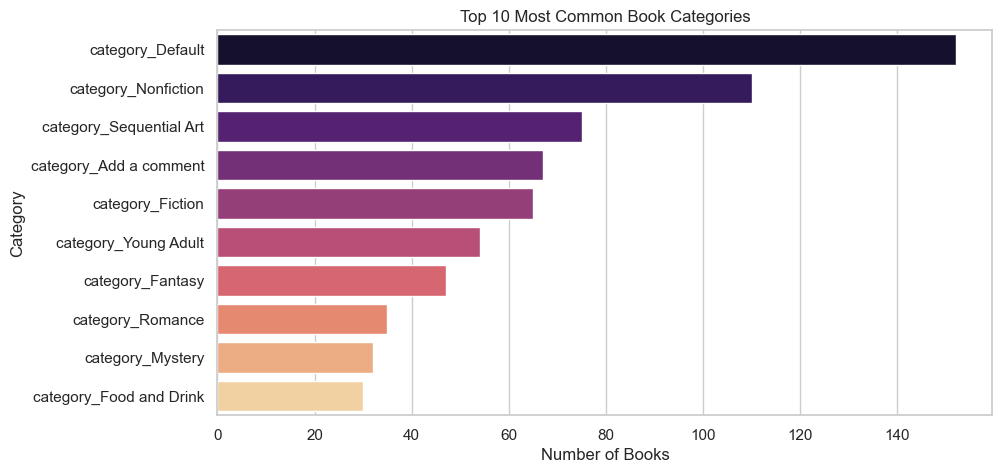

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=category_df,x='count',y='category',hue='category',palette='magma',dodge=False,legend=False)
plt.title('Top 10 Most Common Book Categories')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.show()

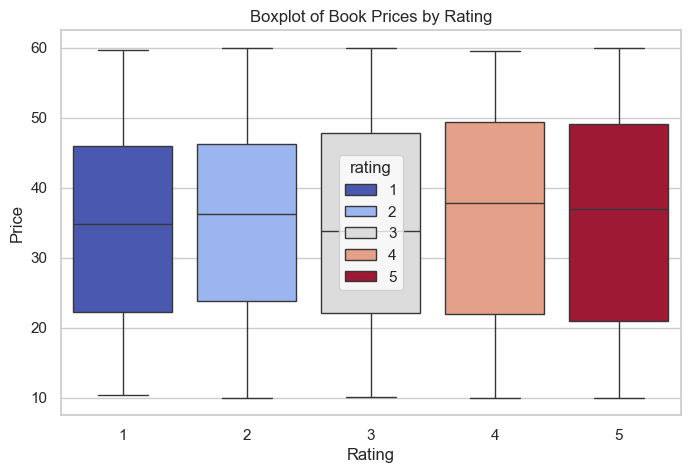

In [41]:
# Scatter plot of price vs rating
plt.figure(figsize=(8,5))
sns.boxplot(x='rating',y='price',data=df,hue='rating',palette='coolwarm')
plt.title('Boxplot of Book Prices by Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

***Plot correlation heatmap***


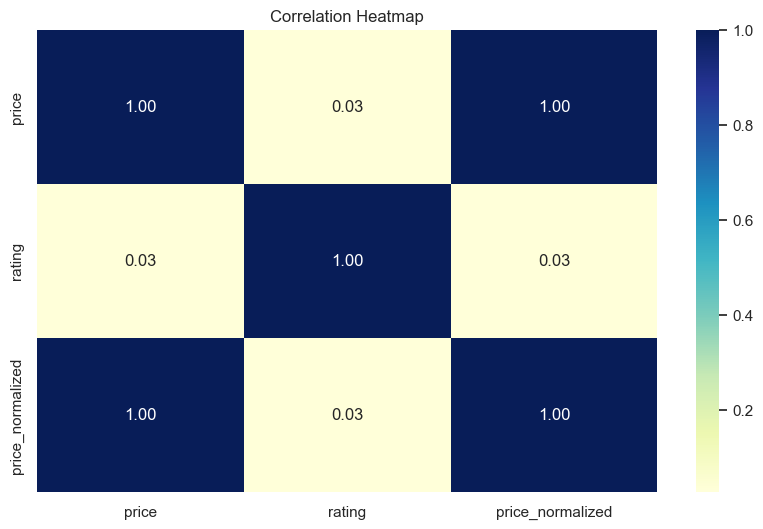

In [43]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Top Book Categories Insights:

From the bar chart of the top 10 most common categories:

High frequency of category_Default and category_Add a comment:

These are likely invalid or placeholder categories.

Suggests a data cleaning opportunity—these categories may distort real trends.

Nonfiction is the most common meaningful category:

Indicates a large interest in factual, real-world topics in this dataset.

Popular genres like Sequential Art, Fiction, Young Adult, Fantasy, and Romance are well represented:

These genres together cover a diverse audience base—from graphic novel readers to fantasy lovers.

Bookstore recommendations or marketing efforts could be tailored to these genres.

Food and Drink appears as a niche but present category:

Could be leveraged for targeted campaigns or specialized book collection

***Task 3: Linear Regression Model***

Problem Statement:

Build a linear regression model to predict a target variable.

Steps to Complete:

Select a suitable dataset for regression.

Split the dataset into training and testing sets.

Train a linear regression model using Scikit-learn.

Evaluate the model’s performance.

Tools/Datasets/Platforms:

Python, Scikit-learn, Jupyter Notebook.

***import all required libraries***

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

***Clean and select numeric columns for regression***

In [46]:
df = df[['price', 'rating']]

***Define features and target***

In [47]:
X=df[['rating']]
y=df['price']

***Split into train and test sets***

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

***Train the linear regression model***

In [49]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

***Make Predictions***

In [50]:
y_pred=model.predict(X_test)

***Evaluate the model***

In [51]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 200.9258658977261
R² Score: -0.005296128537602973


***Plot Regression Line***

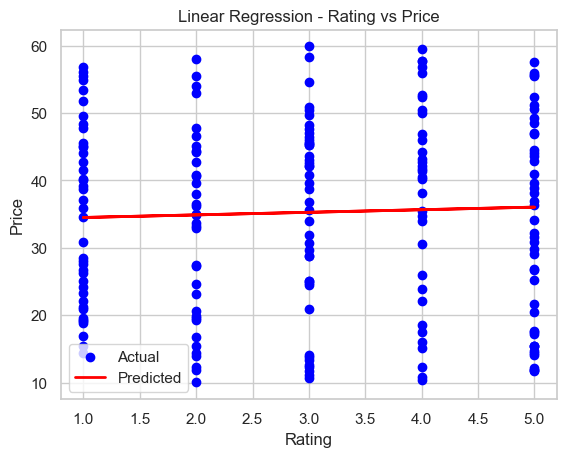

In [52]:
plt.scatter(X_test,y_test,color='blue',label='Actual')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Predicted')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Linear Regression - Rating vs Price')
plt.legend()
plt.show()